### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df.shape

(34299, 12)

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df2 = application_df.drop(columns=['EIN','NAME'])
application_df2.shape

(34299, 10)

In [4]:
# Determine the number of unique values in each column.
application_df2.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
app_type = application_df2.APPLICATION_TYPE.value_counts()
app_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

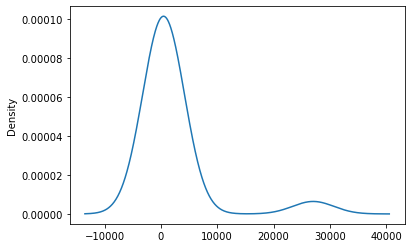

In [6]:
# Visualize the value counts of APPLICATION_TYPE
app_type.plot.density()

In [7]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_type[app_type < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df2.APPLICATION_TYPE = application_df2.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df2.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification = application_df2.CLASSIFICATION.value_counts()
classification.head(10)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

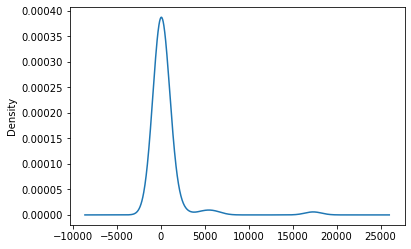

In [9]:
# Visualize the value counts of CLASSIFICATION
classification.plot.density()

<AxesSubplot:ylabel='Density'>

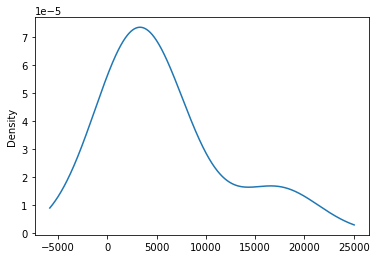

In [10]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification[classification < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df2.CLASSIFICATION = application_df2.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
classification2 =application_df2.CLASSIFICATION.value_counts()
classification2.plot.density()

In [11]:
# Generate our categorical variable lists
application_cat = application_df2.dtypes[application_df2.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df2[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
application_merge_df = application_df2.merge(encode_df,left_index=True, right_index=True)
application_merge_df = application_merge_df.drop(application_cat,1)
application_merge_df.head()

C:\Users\trevo\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
X = application_merge_df.drop(columns="IS_SUCCESSFUL").values
y = application_merge_df.IS_SUCCESSFUL.values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
# 2-3 x # of params. 43* 2.5 = 107.5 ~ 108
hidden_nodes_layer1 =  108
hidden_nodes_layer2 = 43

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 108)               4752      
_________________________________________________________________
dense_1 (Dense)              (None, 43)                4687      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 44        
Total params: 9,483
Trainable params: 9,483
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

In [19]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 1s 543us/step - loss: 0.5700 - accuracy: 0.7213
Epoch 2/50
804/804 [==============================] - 0s 542us/step - loss: 0.5565 - accuracy: 0.7295
Epoch 3/50
804/804 [==============================] - 0s 543us/step - loss: 0.5531 - accuracy: 0.7315
Epoch 4/50
804/804 [==============================] - 0s 546us/step - loss: 0.5521 - accuracy: 0.7305
Epoch 5/50
735/804 [==========================>...] - ETA: 0s - loss: 0.5493 - accuracy: 0.7331
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 0s 561us/step - loss: 0.5503 - accuracy: 0.7321
Epoch 6/50
804/804 [==============================] - 0s 543us/step - loss: 0.5490 - accuracy: 0.7323
Epoch 7/50
804/804 [==============================] - 0s 539us/step - loss: 0.5487 - accuracy: 0.7341
Epoch 8/50
804/804 [==============================] - 0s 543us/step - loss: 0.5475 - accuracy: 0.7358
Epoch 9/50
804/804 [======================

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5539 - accuracy: 0.7258
Loss: 0.553934633731842, Accuracy: 0.7258309125900269


In [21]:
nn.save("AlphabetSoupCharity.h5")

Attempt # 1 increase Epochs

In [22]:
fit_model = nn.fit(X_train_scaled,y_train,epochs=200,callbacks=[cp_callback])

Epoch 1/200
804/804 [==============================] - 0s 564us/step - loss: 0.5381 - accuracy: 0.7400
Epoch 2/200
804/804 [==============================] - 0s 592us/step - loss: 0.5380 - accuracy: 0.7403
Epoch 3/200
804/804 [==============================] - 0s 566us/step - loss: 0.5381 - accuracy: 0.7412
Epoch 4/200
804/804 [==============================] - 0s 559us/step - loss: 0.5376 - accuracy: 0.7400
Epoch 5/200
547/804 [===================>..........] - ETA: 0s - loss: 0.5360 - accuracy: 0.7410
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 0s 566us/step - loss: 0.5374 - accuracy: 0.7406
Epoch 6/200
804/804 [==============================] - 0s 549us/step - loss: 0.5375 - accuracy: 0.7407
Epoch 7/200
804/804 [==============================] - 0s 554us/step - loss: 0.5377 - accuracy: 0.7403
Epoch 8/200
804/804 [==============================] - 0s 561us/step - loss: 0.5375 - accuracy: 0.7395
Epoch 9/200
804/804 [=============

804/804 [==============================] - 0s 571us/step - loss: 0.5345 - accuracy: 0.7413
Epoch 64/200
804/804 [==============================] - 0s 579us/step - loss: 0.5343 - accuracy: 0.7425
Epoch 65/200
266/804 [========>.....................] - ETA: 0s - loss: 0.5357 - accuracy: 0.7383
Epoch 00065: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 0s 581us/step - loss: 0.5346 - accuracy: 0.7416
Epoch 66/200
804/804 [==============================] - 0s 580us/step - loss: 0.5343 - accuracy: 0.7414
Epoch 67/200
804/804 [==============================] - 0s 594us/step - loss: 0.5339 - accuracy: 0.7414
Epoch 68/200
804/804 [==============================] - 0s 575us/step - loss: 0.5340 - accuracy: 0.7419
Epoch 69/200
804/804 [==============================] - 0s 568us/step - loss: 0.5352 - accuracy: 0.7419
Epoch 70/200
269/804 [=========>....................] - ETA: 0s - loss: 0.5385 - accuracy: 0.7362
Epoch 00070: saving model to checkpoints\weig

 90/804 [==>...........................] - ETA: 0s - loss: 0.5210 - accuracy: 0.7615
Epoch 00125: saving model to checkpoints\weights.125.hdf5
804/804 [==============================] - 0s 575us/step - loss: 0.5322 - accuracy: 0.7425
Epoch 126/200
804/804 [==============================] - 0s 579us/step - loss: 0.5356 - accuracy: 0.7417
Epoch 127/200
804/804 [==============================] - 0s 591us/step - loss: 0.5329 - accuracy: 0.7420
Epoch 128/200
804/804 [==============================] - 0s 556us/step - loss: 0.5322 - accuracy: 0.7427
Epoch 129/200
804/804 [==============================] - 0s 558us/step - loss: 0.5322 - accuracy: 0.7418
Epoch 130/200
  1/804 [..............................] - ETA: 0s - loss: 0.5957 - accuracy: 0.7188
Epoch 00130: saving model to checkpoints\weights.130.hdf5
804/804 [==============================] - 0s 569us/step - loss: 0.5324 - accuracy: 0.7423
Epoch 131/200
804/804 [==============================] - 0s 571us/step - loss: 0.5323 - accuracy: 

804/804 [==============================] - 0s 565us/step - loss: 0.5312 - accuracy: 0.7428
Epoch 186/200
804/804 [==============================] - 0s 585us/step - loss: 0.5322 - accuracy: 0.7421
Epoch 187/200
804/804 [==============================] - 0s 576us/step - loss: 0.5325 - accuracy: 0.7423
Epoch 188/200
804/804 [==============================] - 0s 575us/step - loss: 0.5321 - accuracy: 0.7422
Epoch 189/200
629/804 [======================>.......] - ETA: 0s - loss: 0.5316 - accuracy: 0.7432
Epoch 00189: saving model to checkpoints\weights.189.hdf5
804/804 [==============================] - 0s 575us/step - loss: 0.5322 - accuracy: 0.7427
Epoch 190/200
804/804 [==============================] - 0s 571us/step - loss: 0.5309 - accuracy: 0.7430
Epoch 191/200
804/804 [==============================] - 0s 578us/step - loss: 0.5314 - accuracy: 0.7424
Epoch 192/200
804/804 [==============================] - 0s 578us/step - loss: 0.5312 - accuracy: 0.7423
Epoch 193/200
804/804 [========

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5837 - accuracy: 0.7240
Loss: 0.5836834907531738, Accuracy: 0.7239649891853333


Accuracy decrease from: 0.7258309125900269 to 0.7239649891853333


Attempt #2 Increase Neurons to 3x params in Layer one and 2x in layer 2

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
# 2-3 x # of params. 43* 3 = 129
hidden_nodes_layer1 =  129
hidden_nodes_layer2 = 86

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 129)               5676      
_________________________________________________________________
dense_4 (Dense)              (None, 86)                11180     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 87        
Total params: 16,943
Trainable params: 16,943
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
fit_model = nn.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 1s 575us/step - loss: 0.5710 - accuracy: 0.7225
Epoch 2/50
804/804 [==============================] - 0s 565us/step - loss: 0.5581 - accuracy: 0.7296
Epoch 3/50
804/804 [==============================] - 0s 564us/step - loss: 0.5543 - accuracy: 0.7305
Epoch 4/50
545/804 [===================>..........] - ETA: 0s - loss: 0.5535 - accuracy: 0.7295
Epoch 00004: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 0s 580us/step - loss: 0.5522 - accuracy: 0.7320
Epoch 5/50
804/804 [==============================] - 0s 568us/step - loss: 0.5505 - accuracy: 0.7331
Epoch 6/50
804/804 [==============================] - 0s 563us/step - loss: 0.5490 - accuracy: 0.7342
Epoch 7/50
804/804 [==============================] - 0s 568us/step - loss: 0.5488 - accuracy: 0.7339
Epoch 8/50
804/804 [==============================] - 0s 570us/step - loss: 0.5479 - accuracy: 0.7332
Epoch 9/50
546/804 [===================>..

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5544 - accuracy: 0.7247
Loss: 0.5544135570526123, Accuracy: 0.7246647477149963


Accuracy decrease from: 0.7258309125900269 to 0.7246647477149963

In [ ]:
Attempt #3 Change the activations

In [30]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
# 2-3 x # of params. 43* 2.5 = 107.5 ~ 108
hidden_nodes_layer1 =  108
hidden_nodes_layer2 = 43

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 108)               4752      
_________________________________________________________________
dense_7 (Dense)              (None, 43)                4687      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 44        
Total params: 9,483
Trainable params: 9,483
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [32]:
fit_model = nn.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 1s 540us/step - loss: 0.5725 - accuracy: 0.7224
Epoch 2/50
804/804 [==============================] - 0s 544us/step - loss: 0.5568 - accuracy: 0.7294
Epoch 3/50
804/804 [==============================] - 0s 546us/step - loss: 0.5536 - accuracy: 0.7298
Epoch 4/50
375/804 [============>.................] - ETA: 0s - loss: 0.5546 - accuracy: 0.7246
Epoch 00004: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 0s 550us/step - loss: 0.5514 - accuracy: 0.7295
Epoch 5/50
804/804 [==============================] - 0s 546us/step - loss: 0.5496 - accuracy: 0.7320
Epoch 6/50
804/804 [==============================] - 0s 549us/step - loss: 0.5485 - accuracy: 0.7334
Epoch 7/50
804/804 [==============================] - 0s 550us/step - loss: 0.5477 - accuracy: 0.7325
Epoch 8/50
804/804 [==============================] - 0s 553us/step - loss: 0.5473 - accuracy: 0.7337
Epoch 9/50
275/804 [=========>............

In [33]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5521 - accuracy: 0.7276
Loss: 0.5521180629730225, Accuracy: 0.727580189704895


Accuracy decrease from: 0.7258309125900269 to 0.727580189704895

In [34]:
nn.save("AlphabetSoupCharity_Optimization.h5")